In [5]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 104 kB/s eta 0:00:01
     |████████████████████████████████| 346 kB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 12.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

In [13]:
df = pd.read_csv('/Users/katyasva/Downloads/Sleep_health_and_lifestyle_dataset.csv')
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df = df.drop('Person ID', axis=1)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,0,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [21]:
summ_table = pd.DataFrame({
    'Count': df.count(axis=0, numeric_only=False),
    'Mean': df.mean(numeric_only=True),
    'Std': df.std(numeric_only=True),
    'Min': df.min(numeric_only=True),
    'Max': df.max(numeric_only=True),
    '25% Q': df.quantile(0.25, numeric_only=True),
    '50% Q': df.quantile(0.50, numeric_only=True),  # Median
    '75% Q': df.quantile(0.75, numeric_only=True),
})

summ_table
summ_table_cleaned = summ_table.dropna()

summ_table_cleaned

,Count,Mean,Std,Min,Max,25% Q,50% Q,75% Q
Age,374,42.184492,8.673133,27.0,59.0,35.25,43.0,50.0
Daily Steps,374,6816.844920,1617.915679,3000.0,10000.0,5600.00,7000.0,8000.0
Gender,374,0.505348,0.500641,0.0,1.0,0.00,1.0,1.0
Heart Rate,374,70.165775,4.135676,65.0,86.0,68.00,70.0,72.0
Physical Activity Level,374,59.171123,20.830804,30.0,90.0,45.00,60.0,75.0
Quality of Sleep,374,7.312834,1.196956,4.0,9.0,6.00,7.0,8.0
Sleep Duration,374,7.132086,0.795657,5.8,8.5,6.40,7.2,7.8
Stress Level,374,5.385027,1.774526,3.0,8.0,4.00,5.0,7.0


In [15]:
nan_counts = df.isnull().sum()
nan_counts

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [18]:
df.dtypes

Gender                       int64
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [ ]:
pip install matplotlib

In [51]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

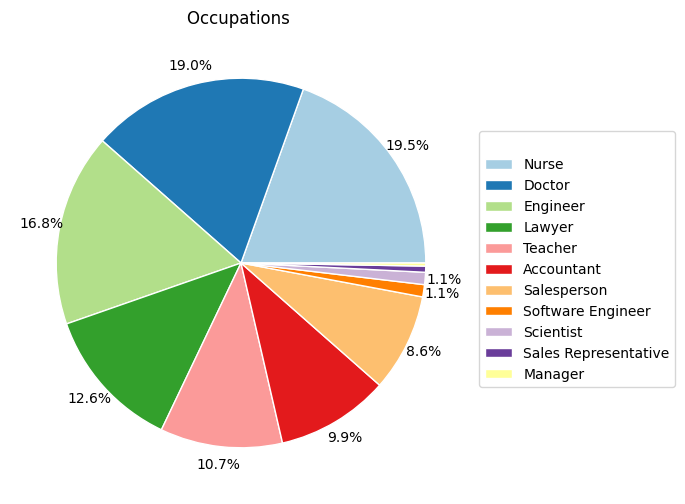

In [91]:

occupation_counts = df['Occupation'].value_counts()
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 1.0 else ''
plt.figure(figsize=(8, 6))  
plt.pie(
    occupation_counts, 
    autopct=autopct_format,  
    wedgeprops = {'edgecolor': 'white','linewidth': 1},
    pctdistance=1.1, 
    labeldistance=1.2,
    colors=plt.cm.Paired.colors)

plt.title("Occupations ")  
plt.legend(occupation_counts.index, title=" ", bbox_to_anchor=(1, 0.8)) 
plt.show()